In [1]:
from skimage import io
import skimage
from matplotlib import pyplot as plt
import numpy as np
from skimage import exposure 

## Example:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


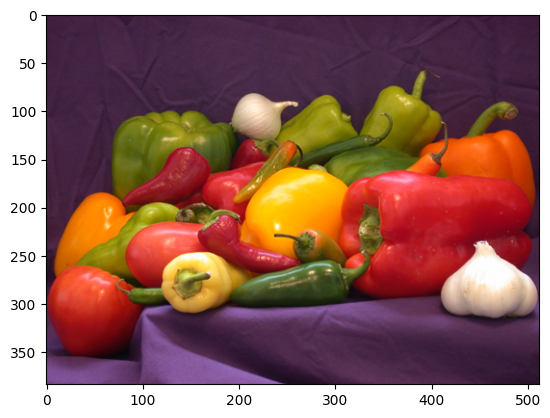

In [2]:
x = skimage.io.imread('peppers.png') 

# gray scale image - N x M matrix
# color image - N x M x 3 matrix (RGB)
# M - horizontal (X), N - vertical (Y), 0,0 - upper left

# transforming matrix from original format to float / uint if we need to calcualte sth
x_float = skimage.img_as_float(x) 
x_uint = skimage.img_as_uint(x_float)

plt.imshow(x) 
plt.imshow(x_uint) 
plt.imshow(x_float) 
plt.show() 

## Exercise 1.1

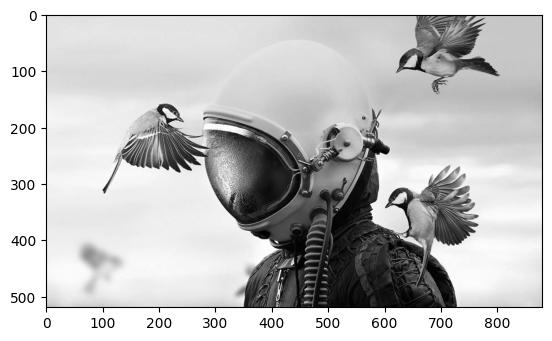

Dimentions of dreamers image:  2
Range of pixels:  0  :  255


In [3]:
dreamers = skimage.io.imread('dreamers.png')
plt.imshow(dreamers, cmap='gray')
plt.show()
dreamers_dimentions = np.ndim(dreamers)
dreamers_min = np.min(dreamers)
dreamers_max = np.max(dreamers)
print("Dimentions of dreamers image: ", dreamers_dimentions)
print("Range of pixels: ", dreamers_min, " : " , dreamers_max)

## Exercise 1.2

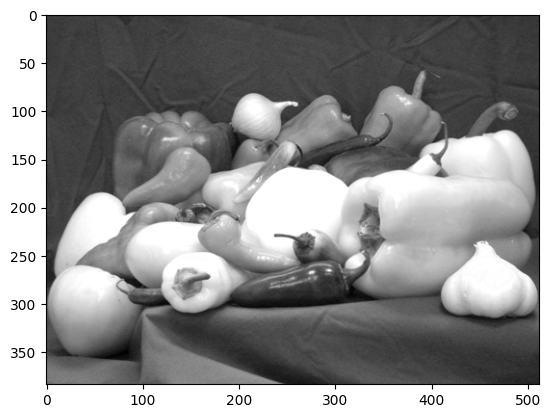

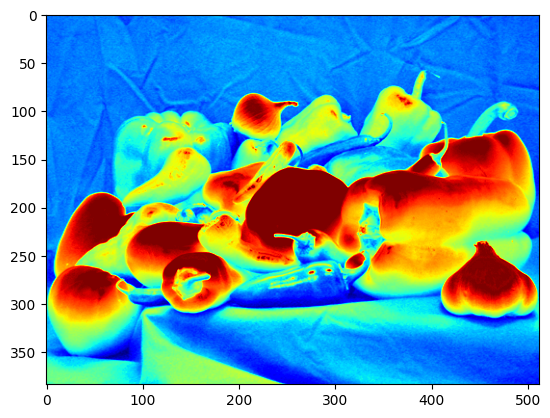

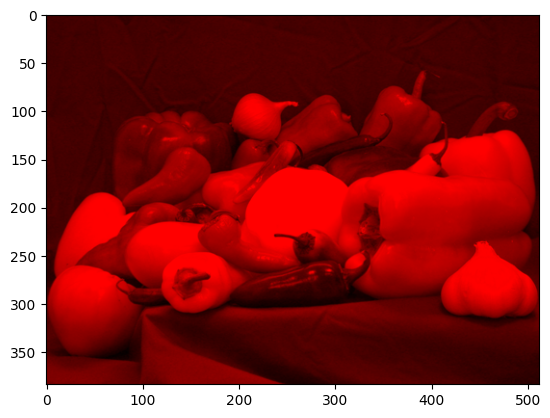

In [4]:
peppers = skimage.io.imread('peppers.png')
peppers_red = peppers[:,:,0]
plt.imshow(peppers_red, cmap="gray")
plt.show()
plt.imshow(peppers_red, cmap="jet")
plt.show()
peppers[:,:,1] = 0
peppers[:,:,2] = 0
plt.imshow(peppers)
plt.show()

## Exercise 2.1

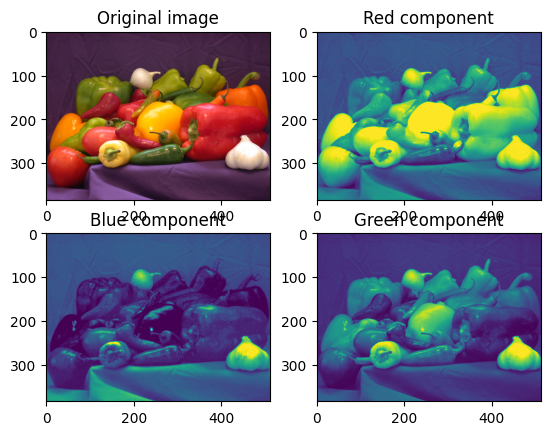

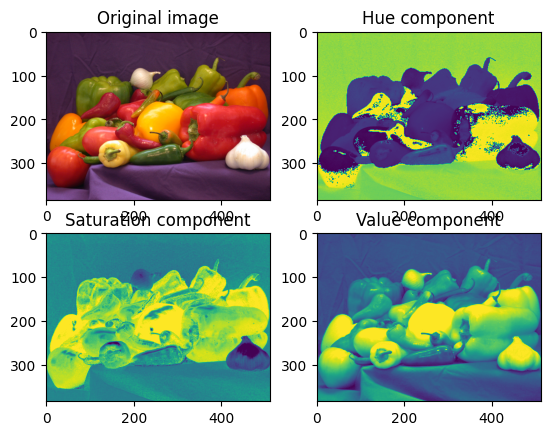

Range of h values:  0.0  :  0.9991408934707904
0 value of H represents red
0, 0, 100% is white in HSV


In [5]:
peppers = skimage.io.imread('peppers.png')
peppers_red = peppers[:,:,0]
peppers_green = peppers[:,:,1]
peppers_blue = peppers[:,:,2]

# RGB:
plt.subplot(2,2,1)
plt.imshow(peppers)
plt.title("Original image")
plt.subplot(2,2,2)
plt.imshow(peppers_red)
plt.title("Red component")
plt.subplot(2,2,3)
plt.imshow(peppers_blue)
plt.title("Blue component")
plt.subplot(2,2,4)
plt.imshow(peppers_green)
plt.title("Green component")
plt.show()

# HSV:
peppers_hsv = skimage.color.rgb2hsv(peppers)
plt.subplot(2,2,1)
plt.imshow(peppers)
plt.title("Original image")
plt.subplot(2,2,2)
plt.imshow(peppers_hsv[:,:,0])
plt.title("Hue component")
plt.subplot(2,2,3)
plt.imshow(peppers_hsv[:,:,1])
plt.title("Saturation component")
plt.subplot(2,2,4)
plt.imshow(peppers_hsv[:,:,2])
plt.title("Value component")
plt.show()

peppers_h = peppers_hsv[:,:,0]
pepperrs_h_min = np.min(peppers_h)
pepperrs_h_max = np.max(peppers_h)
print("Range of h values: ", pepperrs_h_min, " : " , pepperrs_h_max)
print("0 value of H represents red")
print("0, 0, 100% is white in HSV")

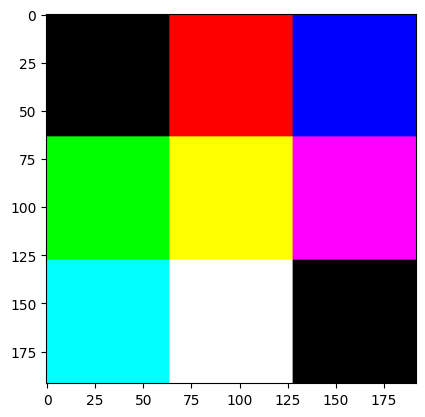

In [6]:
zeros = np.zeros(64).astype(int)
fulls = np.ones(64).astype(int) * 255

black_red_blue_r = np.concatenate((zeros, fulls, zeros))
black_red_blue_g = np.concatenate((zeros, zeros, zeros))
black_red_blue_b = np.concatenate((zeros, zeros, fulls))

green_yellow_magenta_r = np.concatenate((zeros, fulls, fulls))
green_yellow_magenta_g = np.concatenate((fulls, fulls, zeros))
green_yellow_magenta_b = np.concatenate((zeros, zeros, fulls))

torqoise_white_black_r = np.concatenate((zeros, fulls, zeros))
torqoise_white_black_g = np.concatenate((fulls, fulls, zeros))
torqoise_white_black_b = np.concatenate((fulls, fulls, zeros))

r = np.concatenate((np.tile(black_red_blue_r, 64), np.tile(green_yellow_magenta_r, 64), np.tile(torqoise_white_black_r, 64)))
g = np.concatenate((np.tile(black_red_blue_g, 64), np.tile(green_yellow_magenta_g, 64), np.tile(torqoise_white_black_g, 64)))
b = np.concatenate((np.tile(black_red_blue_b, 64), np.tile(green_yellow_magenta_b, 64), np.tile(torqoise_white_black_b, 64)))

pic = [[r[i], g[i], b[i]] for i in range(len(r))]
picture = np.array_split(pic, 192)


plt.imshow(picture)

# Histograms

## Exercise 3.1

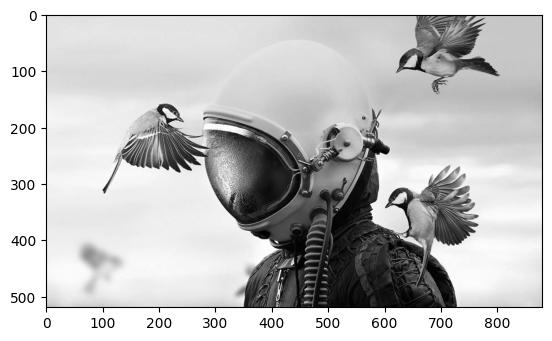

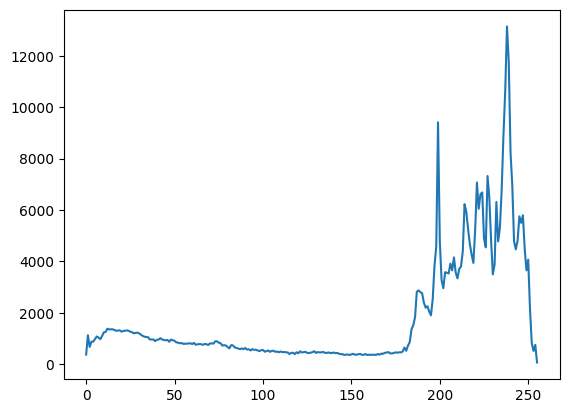

In [7]:
dreamers = io.imread("dreamers.png")
plt.imshow(dreamers, cmap="gray")
plt.show()
h, bins = exposure.histogram(dreamers) 
plt.plot(bins,h) 
plt.show()

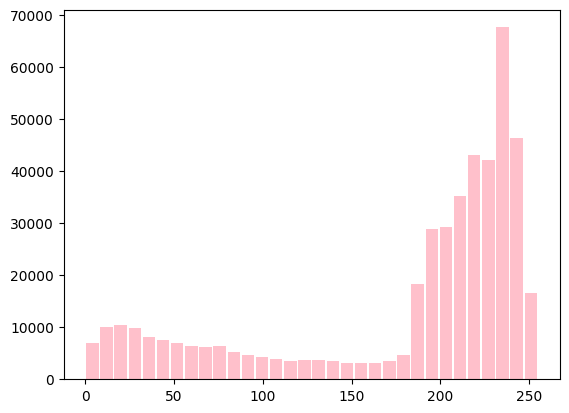

In [8]:
dreamers_float = skimage.img_as_float(dreamers)
# h - values, bins - centers of bins
h, bins = exposure.histogram(dreamers_float, nbins=32)
plt.bar(255*bins, h, 7, color="pink") 
plt.show()

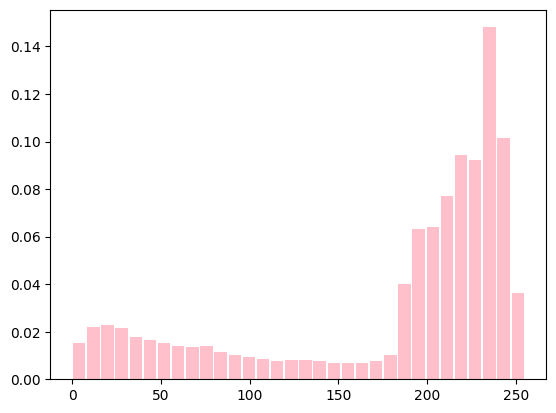

In [9]:
# Normalized version of histogram: (we can see probability on the axis)
h, bins = exposure.histogram(dreamers_float, nbins=32, normalize=True)
plt.bar(255*bins, h, 7, color="pink")
plt.show()

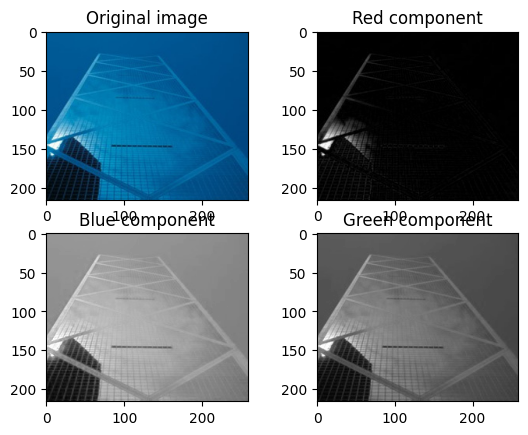

In [10]:
# Color images
building = io.imread("187_0070.jpg")
building_red = building[:,:,0]
building_green = building[:,:,1]
building_blue = building[:,:,2]

# RGB:
plt.subplot(2,2,1)
plt.imshow(building)
plt.title("Original image")
plt.subplot(2,2,2)
plt.imshow(building_red, cmap="gray")
plt.title("Red component")
plt.subplot(2,2,3)
plt.imshow(building_blue, cmap="gray")
plt.title("Blue component")
plt.subplot(2,2,4)
plt.imshow(building_green, cmap="gray")
plt.title("Green component")
plt.show()

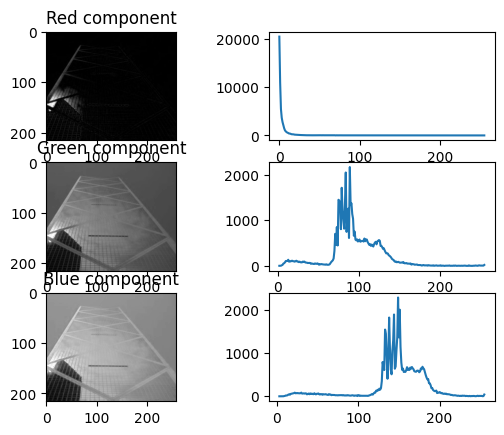

In [11]:
plt.subplot(3,2,1)
plt.imshow(building_red, cmap = "gray")
plt.title("Red component")

plt.subplot(3,2,2)
h, bins = exposure.histogram(building_red) 
plt.plot(bins,h) 

plt.subplot(3,2,3)
plt.imshow(building_green, cmap = "gray")
plt.title("Green component")

plt.subplot(3,2,4)
h, bins = exposure.histogram(building_green) 
plt.plot(bins,h) 

plt.subplot(3,2,5)
plt.imshow(building_blue, cmap = "gray")
plt.title("Blue component")

plt.subplot(3,2,6)
h, bins = exposure.histogram(building_blue) 
plt.plot(bins,h) 
plt.show()

# Histogram Equalization

## Exercise 4.1

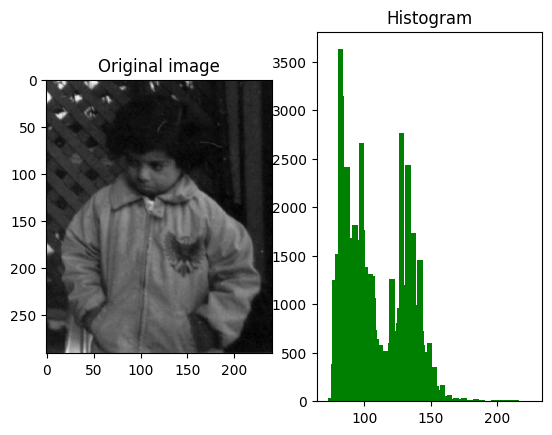

In [12]:
pout = io.imread("pout.tif")

plt.subplot(1,2,1)
plt.imshow(pout, cmap="gray")
plt.title("Original image")

plt.subplot(1,2,2)
h, bins = exposure.histogram(pout)
plt.bar(bins, h, 4, color="green")
plt.title("Histogram")

plt.show()

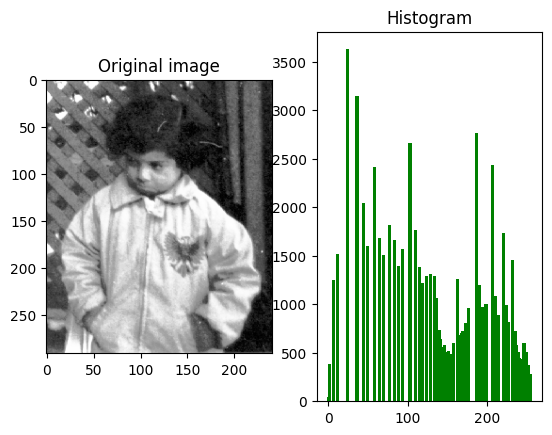

In [13]:
pout_equalized_hist = exposure.equalize_hist(pout)

plt.subplot(1,2,1)
plt.imshow(pout_equalized_hist, cmap="gray")
plt.title("Original image")

plt.subplot(1,2,2)
hi, bins1 = exposure.histogram(pout_equalized_hist)
plt.bar(255*bins1, hi, 4, color="green")
plt.title("Histogram")

plt.show()

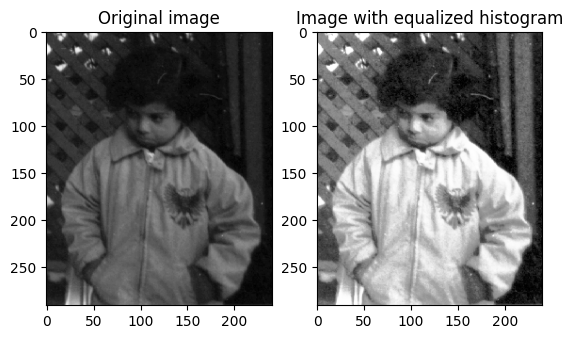

In [14]:
plt.subplot(1,2,1)
plt.imshow(pout, cmap="gray")
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(pout_equalized_hist, cmap="gray")
plt.title("Image with equalized histogram")

plt.show()

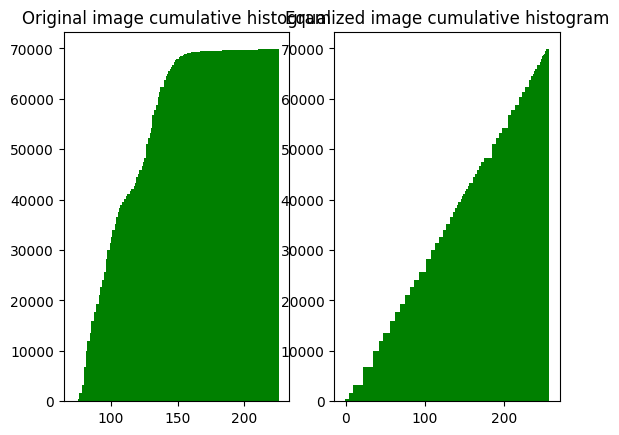

In [15]:
cum_original_hist = np.cumsum(h)
cum_equalized_hist = np.cumsum(hi)

plt.subplot(1,2,1)
plt.bar(bins, cum_original_hist, 4, color="green")
plt.title("Original image cumulative histogram")

plt.subplot(1,2,2)
plt.bar(255*bins1, cum_equalized_hist, 4, color="green")
plt.title("Equalized image cumulative histogram")

plt.show()


## Exercise 4.2

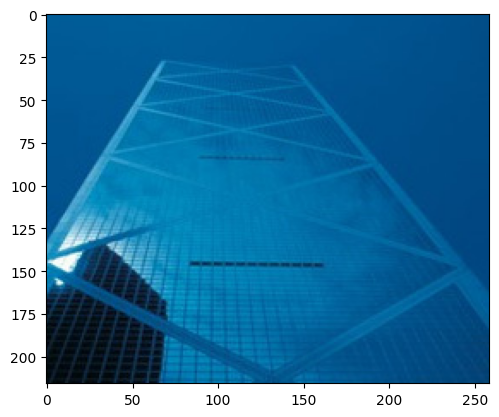

In [16]:
building = io.imread("187_0070.jpg")
plt.imshow(building)
plt.show()

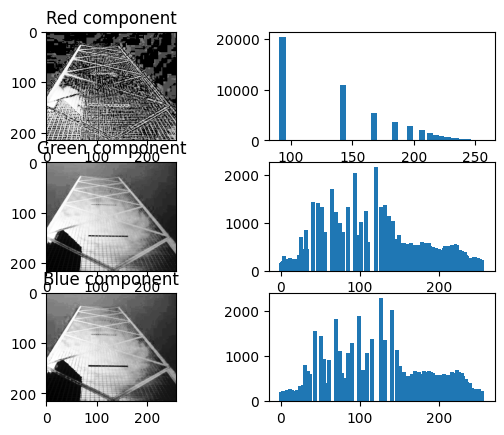

In [17]:
building_red = building[:,:,0]
building_green = building[:,:,1]
building_blue = building[:,:,2]

building_red_equa = exposure.equalize_hist(building_red)
building_green_equa = exposure.equalize_hist(building_green)
building_blue_equa = exposure.equalize_hist(building_blue)

plt.subplot(3,2,1)
plt.imshow(building_red_equa, cmap = "gray")
plt.title("Red component")

plt.subplot(3,2,2)
h, bins = exposure.histogram(building_red_equa)
plt.bar(255*bins,h,5) 

plt.subplot(3,2,3)
plt.imshow(building_green_equa, cmap = "gray")
plt.title("Green component")

plt.subplot(3,2,4)
h, bins = exposure.histogram(building_green_equa) 
plt.bar(255*bins,h,5) 

plt.subplot(3,2,5)
plt.imshow(building_blue_equa, cmap = "gray")
plt.title("Blue component")

plt.subplot(3,2,6)
h, bins = exposure.histogram(building_blue_equa)
plt.bar(255*bins,h,5) 
plt.show()

Text(0.5, 1.0, 'Equalized v image')

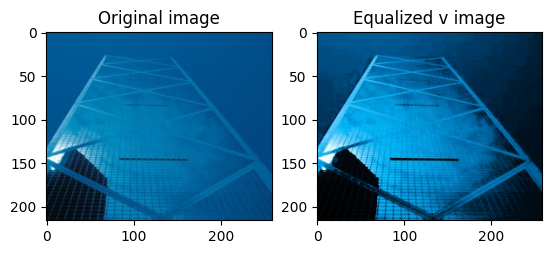

In [18]:
building_hsv = skimage.color.rgb2hsv(building)
buildings_v = building_hsv[:,:,2]
buildings_v = exposure.equalize_hist(buildings_v)
building_hsv[:,:,2] = buildings_v
building_rgb = skimage.color.hsv2rgb(building_hsv)

plt.subplot(1,2,1)
plt.imshow(building)
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(building_rgb)
plt.title("Equalized v image")


Text(0.5, 1.0, 'Linear contrast adjustment image')

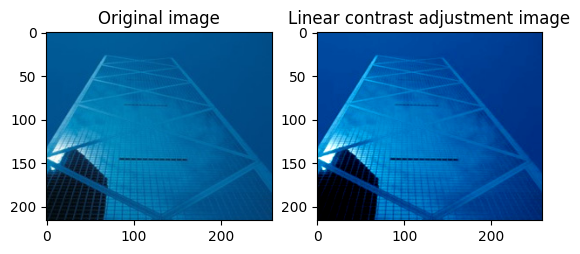

In [19]:
building_linear = exposure.rescale_intensity(building, in_range = (0.15*255, 0.85*255))

plt.subplot(1,2,1)
plt.imshow(building)
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(building_linear)
plt.title("Linear contrast adjustment image")

# Filters

## Exercise 5.1 - low pass filters


Text(0.5, 1.0, 'Gaussian image')

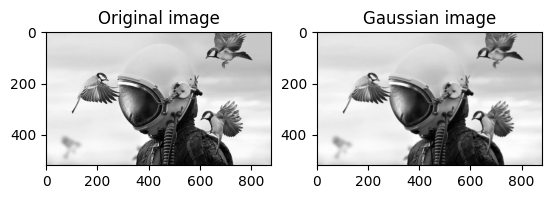

In [20]:
dreamers = io.imread("dreamers.png")
dreamers_gauss = skimage.filters.gaussian(dreamers)

plt.subplot(1,2,1)
plt.imshow(dreamers, cmap = "gray")
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(dreamers_gauss, cmap = "gray")
plt.title("Gaussian image")

Text(0.5, 1.0, 'Gaussian image')

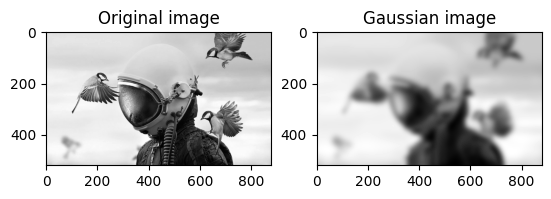

In [21]:
dreamers_gauss = skimage.filters.gaussian(dreamers, sigma=10)

plt.subplot(1,2,1)
plt.imshow(dreamers, cmap = "gray")
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(dreamers_gauss, cmap = "gray")
plt.title("Gaussian image")

Text(0.5, 1.0, 'Random noise image')

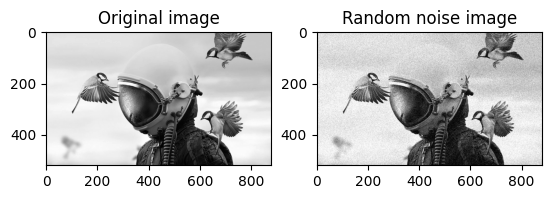

In [22]:
dreamers_g = skimage.util.random_noise(dreamers, mode="gaussian")

plt.subplot(1,2,1)
plt.imshow(dreamers, cmap = "gray")
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(dreamers_g, cmap = "gray")
plt.title("Random noise image")

Text(0.5, 1.0, 'Gaussian image')

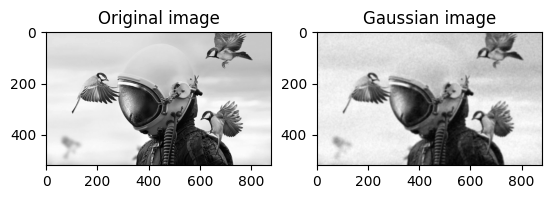

In [23]:
dreamers_gauss = skimage.filters.gaussian(dreamers_g, sigma=2)

plt.subplot(1,2,1)
plt.imshow(dreamers, cmap = "gray")
plt.title("Original image")

plt.subplot(1,2,2)
plt.imshow(dreamers_gauss, cmap = "gray")
plt.title("Gaussian image")

## Exercise 5.2 - high pass filters

### Exercise 5.2.1

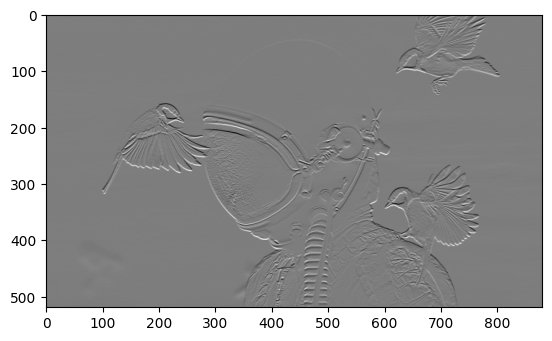

In [24]:
dreamers_edges = skimage.filters.sobel_h(dreamers)
plt.imshow(dreamers_edges, cmap = "gray")

### Exercise 5.2.2

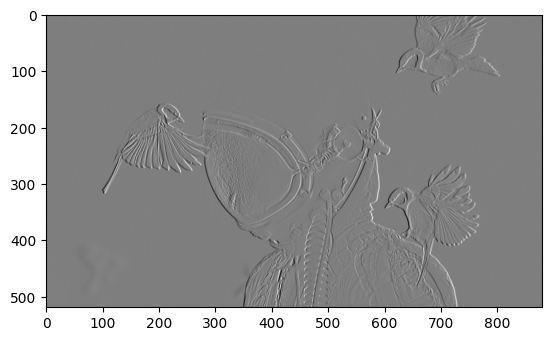

In [25]:
dreamers_edges = skimage.filters.sobel_v(dreamers)
plt.imshow(dreamers_edges, cmap = "gray")

### Exercise 5.2.3

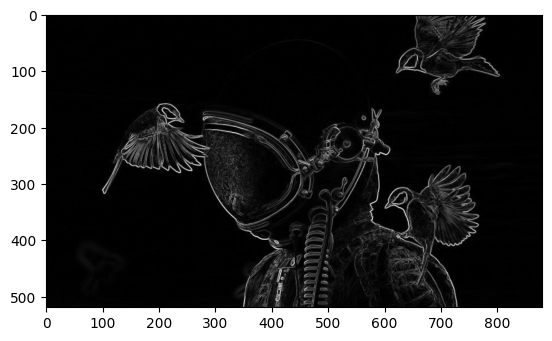

In [26]:
dreamers_edges = skimage.filters.sobel(dreamers)
plt.imshow(dreamers_edges, cmap = "gray")

## Exercise 5.3 - median filter

Text(0.5, 1.0, 'Image with 11x11 median')

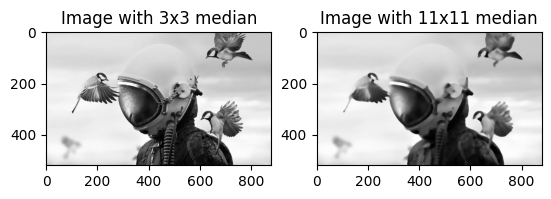

In [27]:
dreamers_median_3_3 = skimage.filters.rank.median(dreamers, np.ones((3,3)))
dreamers_median_11_11 = skimage.filters.rank.median(dreamers, np.ones((11,11)))

plt.subplot(1,2,1)
plt.imshow(dreamers_median_3_3, cmap = "gray")
plt.title("Image with 3x3 median")

plt.subplot(1,2,2)
plt.imshow(dreamers_median_11_11, cmap = "gray")
plt.title("Image with 11x11 median")

/tmp/ipykernel_2749/3308992351.py:3: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  dreamers_median_3_3 = skimage.filters.rank.median(dreamers_sp, np.ones((3,3)))
/tmp/ipykernel_2749/3308992351.py:4: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  dreamers_median_11_11 = skimage.filters.rank.median(dreamers_sp, np.ones((11,11)))


Text(0.5, 1.0, 'Image with 11x11 median')

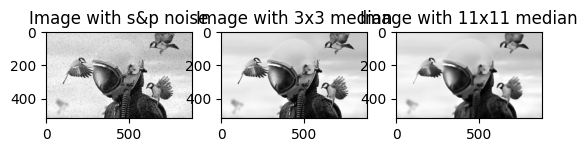

In [28]:
dreamers_sp = skimage.util.random_noise(dreamers, mode='s&p')

dreamers_median_3_3 = skimage.filters.rank.median(dreamers_sp, np.ones((3,3)))
dreamers_median_11_11 = skimage.filters.rank.median(dreamers_sp, np.ones((11,11)))

plt.subplot(1,3,1)
plt.imshow(dreamers_sp, cmap = "gray")
plt.title("Image with s&p noise")

plt.subplot(1,3,2)
plt.imshow(dreamers_median_3_3, cmap = "gray")
plt.title("Image with 3x3 median")

plt.subplot(1,3,3)
plt.imshow(dreamers_median_11_11, cmap = "gray")
plt.title("Image with 11x11 median")

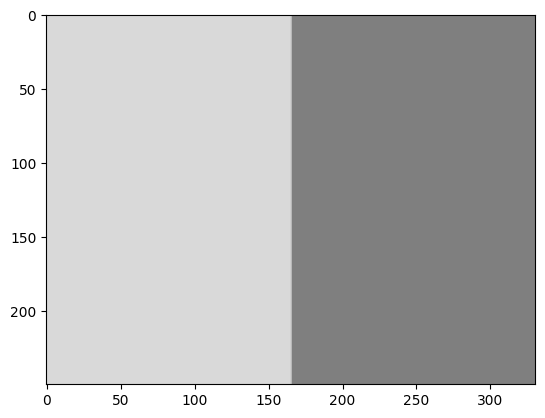

/home/yamroza/.local/lib/python3.10/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


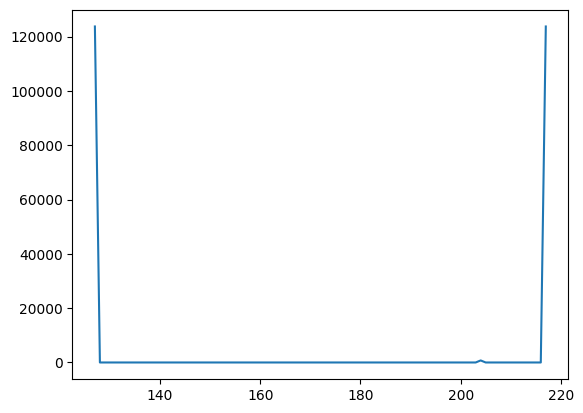

In [2]:
rec = io.imread("rec.png")
plt.imshow(rec)
plt.show()
h, bins = exposure.histogram(rec) 
plt.plot(bins,h) 
plt.show()